# Comparing Male and Female Verbal Performance
Declan O'Neill

This report will compare male and female performance in the verbal section of the SATs for a certain high school.

The data are held in [`sat_scores.csv`](./sat_scores.csv), telling the gender, verbal SAT score, and math SAT score for the students in this high school who took the SAT. To load it, we will use [pandas](https://pandas.pydata.org/), a python library built for working with and analyzing data.

In [1]:
import pandas as pd
sat_df = pd.read_csv("sat_scores.csv")
print(sat_df)

    gender  verbal  math
0        f     630   660
1        f     590   580
2        m     750   800
3        m     600   690
4        m     610   550
5        f     490   800
6        f     680   610
7        m     520   540
8        f     680   660
9        m     650   700
10       m     600   560
11       f     550   560
12       m     490   390
13       f     530   530
14       m     560   560
15       f     630   590
16       f     510   520
17       m     710   740
18       f     550   560
19       m     690   620
20       m     700   700
21       m     540   620
22       f     280   500
23       m     710   760
24       f     640   710
25       m     600   590
26       m     610   670
27       m     680   670
28       f     520   470
29       f     730   740
..     ...     ...   ...
273      f     570   530
274      f     560   540
275      f     670   520
276      m     650   710
277      f     690   700
278      m     610   740
279      f     500   650
280      m     560   700


Let's separate this dataframe into two new dataframes: one for male verbal SAT scores, the other for female verbal SAT scores.

In [2]:
male_verbal_SAT_df = sat_df[sat_df["gender"] == "m"]["verbal"]
female_verbal_SAT_df = sat_df[sat_df["gender"] == "f"]["verbal"]

Although these data come from a census, and population parameters can be calculated, we will take a random sample from each dataframe and compare those. To generate a sample, we will use [`pandas.DataFrame.sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html). For the test that will be done later, it is important that size of each sample not exceed 10% of the size of the population. We will take a sample with a size 9% of each population.

In [3]:
male_verbal_SAT_sample_df = male_verbal_SAT_df.sample(frac=0.09)
female_verbal_SAT_sample_df = female_verbal_SAT_df.sample(frac=0.09)

Now that we have our samples, we need to calculate their summary statistics. For this, we will use [numpy](http://www.numpy.org/), a python library designed for scientific computing.

In [4]:
import numpy as np

male_n                       = len(male_verbal_SAT_sample_df)
male_mean                    = float(np.mean(male_verbal_SAT_sample_df))
male_standard_deviation      = float(np.std(male_verbal_SAT_sample_df))
male_mean_standard_deviation = float(male_standard_deviation / np.sqrt(male_n))

female_n                       = len(female_verbal_SAT_sample_df)
female_mean                    = float(np.mean(female_verbal_SAT_sample_df))
female_standard_deviation      = float(np.std(female_verbal_SAT_sample_df))
female_mean_standard_deviation = float(female_standard_deviation / np.sqrt(female_n))

degrees_of_freedom = min(male_n-1, female_n-1)

print("Male:")
print(" n                       =", male_n)
print(" mean                    =", male_mean)
print(" standard deviation      =", male_standard_deviation)
print(" mean standard deviation =", male_mean_standard_deviation)

print("\nFemale:")
print(" n                       =", female_n)
print(" mean                    =", female_mean)
print(" standard deviation      =", female_standard_deviation)
print(" mean standard deviation =", female_mean_standard_deviation)

print("\nShared:")
print(" degrees of freedom      =", degrees_of_freedom)

Male:
 n                       = 14
 mean                    = 583.5714285714286
 standard deviation      = 73.73767624463889
 mean standard deviation = 19.707222928878465

Female:
 n                       = 13
 mean                    = 627.6923076923077
 standard deviation      = 116.49720010856954
 mean standard deviation = 32.310509879956655

Shared:
 degrees of freedom      = 12


With these statistics calculated, we can run a **two-sample two-tail t-test** to compare male and female performance in the verbal section of the SATs for this high school. Before we do, though, we have to check certain conditions.

### 1. Random sample of male and female verbal SAT scores
We used [`pandas.DataFrame.sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html), which generates pseudo-random samples. They may not be perfect, but they're random enough.

### 2. n-male and n-female are less than 10% of their total populations
We kept this in mind when generating the samples, using only 9% of each total population. This condition checks out.

### 3. Sample comes from a distribution that is unimodal and symmetric
Let's generate a histogram of each dataset. We'll use [matplotlib](https://matplotlib.org/), a python library for plotting data.

### 4. Samples are mutually independent of one another
This is generally a safe assumption to make. Unless many people from different gender groups studies together or cheated off of one another, this condition checks out.

(array([  1.,   4.,   9.,  13.,  17.,  38.,  33.,  26.,  12.,   5.]),
 array([ 310.,  359.,  408.,  457.,  506.,  555.,  604.,  653.,  702.,
         751.,  800.]),
 <a list of 10 Patch objects>)

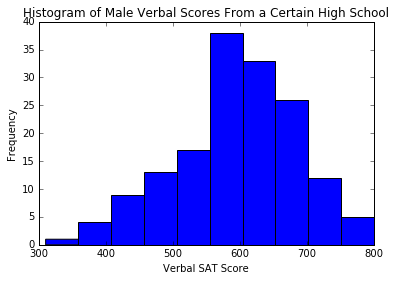

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.xlabel('Verbal SAT Score')
plt.ylabel('Frequency')
plt.title('Histogram of Male Verbal Scores From a Certain High School')
plt.hist(male_verbal_SAT_df)

(array([  1.,   4.,   4.,   5.,  18.,  24.,  25.,  33.,  20.,  11.]),
 array([ 280.,  329.,  378.,  427.,  476.,  525.,  574.,  623.,  672.,
         721.,  770.]),
 <a list of 10 Patch objects>)

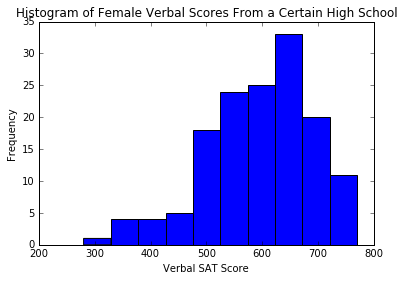

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.xlabel('Verbal SAT Score')
plt.ylabel('Frequency')
plt.title('Histogram of Female Verbal Scores From a Certain High School')
plt.hist(female_verbal_SAT_df)

Although each of these plots could be described as unimodal skewed left, they will be *"normal enough"* to work with.

With these conditions met, we may run the **two-sample two-tail t-test**. Let's define the null and alternative hypotheses.

$$H_{0}: \mu_{male} - \mu_{female} = 0$$
$$H_{A}: \mu_{male} - \mu_{female} ≠ 0$$

The null hypothesis ($H_{0}$) states that there is ***no*** difference between the true means of male and female verbal SAT scores.

The alternative hypothesis ($H_{A}$) states that there ***is*** a difference between the true means of male and female verbal SAT scores.

We can determine whether the null hypothesis should be accepted or not by calculating the t-statistic and its corresponding p-value.

$$t-statistic = t_{df} = \frac{(\bar{X}_{male} - \bar{X}_{female}) - 0}{SE(\bar{X}_{male} - \bar{X}_{female})}$$

$$SE(\bar{X}_{male} - \bar{X}_{female}) = \sqrt{SE(\bar{X}_{male})^{2} + SE(\bar{X}_{female})^{2}}$$

$df$ represents the degrees of freedom, $\bar{X}_{a}$ represents the mean of sample $a$, and $SE(\bar{X}_{a})$ represents the mean standard deviation of sample $a$.

In [7]:
sum_std = float(np.sqrt(male_mean_standard_deviation**2 + female_mean_standard_deviation**2))
t_stat = (male_mean - female_mean) / sum_std
print("t-statistic =", t_stat)

t-statistic = -1.1657905714919992


To find the p-value of a two-tailed t-test, we take the probability that any t-statistic from a student's t-distribution with the same degrees of freedom would be greater than or equal to the absolute value of this one, and then multiply it by two.

$$p-value = 2P(t_{12} ≥ t-statistic)$$

[scipy](https://www.scipy.org/) has a convenient function for calculating such probabilities: `scipy.stats.t.sf`

In [8]:
import scipy.stats

p_val = 2 * scipy.stats.t.sf(np.abs(t_stat), degrees_of_freedom)
alpha = 0.05

if p_val < alpha:
    print("With a p-value of %s%%, this test rejects the null hypothesis in favor of the alternative" % (round(p_val*100,4)))
else:
    print("With a p-value of %s%%, this test fails to reject the null hypothesis" % (round(p_val*100,4)))

With a p-value of 26.6348%, this test fails to reject the null hypothesis


The test has failed to reject that there is no difference between the true means of male and female verbal SAT scores for this high school.